Chapter 27
# 二元概率密度估计
Book_1《编程不难》 | 鸢尾花书：从加减乘除到机器学习  

In [24]:
import matplotlib.pyplot as plt 

In [40]:
# 定义可视化函数
def plot_surface(xx1, xx2, surface, x1_s, x2_s, z_height, color, title_txt):
    fig = plt.figure(figsize=(8,3))
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.plot_wireframe(xx1, xx2, surface, cstride = 8, rstride = 8, color = [0.7,0.7,0.7], linewidth = 0.25)
    ax.scatter(x1_s, x2_s, x2_s*0, c=color)
    ax.contour(xx1, xx2, surface,20, cmap = 'RdYlBu_r')
    
    ax.set_proj_type('ortho')
    
    ax.set_xlabel('Sepal length, $x_1$'); ax.set_ylabel('Sepal width, $x_2$'); ax.set_zlabel('PDF')
    ax.set_xticks([]); ax.set_yticks([]); ax.set_zticks([])
    ax.set_xlim(x1.min(), x1.max()); ax.set_ylim(x2.min(), x2.max()); ax.set_zlim([0,z_height])
    
    ax.view_init(azim=-120, elev=30)
    ax.set_title(title_txt)
    ax.grid(False)
    
    ax = fig.add_subplot(1, 2, 2)
    ax.contourf(xx1, xx2, surface, 12, cmap='RdYlBu_r')
    ax.contour(xx1, xx2, surface, 12, colors='w')
    ax.set_xticks([]); ax.set_yticks([])
    ax.set_xlim(x1.min(), x1.max()); ax.set_ylim(x2.min(), x2.max())
    ax.set_xlabel('Sepal length, $x_1$'); ax.set_ylabel('Sepal width, $x_2$')
    ax.set_aspect('equal', adjustable='box')
    ax.set_title(title_txt)

In [27]:
import numpy as np
import statsmodels.api as sm
import pandas as pd  
from sklearn.datasets import load_iris
import scipy.stats as st

In [28]:
# 导入鸢尾花数据
iris = load_iris()
X_1_to_4 = iris.data; y = iris.target

In [29]:
feature_names = ['Sepal length, $X_1$','Sepal width, $X_2$', 'Petal length, $X_3$','Petal width, $X_4$']
X_df = pd.DataFrame(X_1_to_4)
X1_2_df = X_df.iloc[:, [0,1]]

In [30]:
x1 = np.linspace(4,8,161); x2 = np.linspace(1,5,161)
xx1, xx2 = np.meshgrid(x1,x2)
positions = np.vstack([xx1.ravel(), xx2.ravel()])
colors = ['#FF3300','#0099FF','#8A8A8A']

In [31]:
KDE = st.gaussian_kde(X1_2_df.values.T)
f_x1_x2 = np.reshape(KDE(positions).T, xx1.shape)

In [35]:
x1_s = X1_2_df.iloc[:, 0]
x2_s = X1_2_df.iloc[:, 1]

In [33]:
# 可视化证据因子

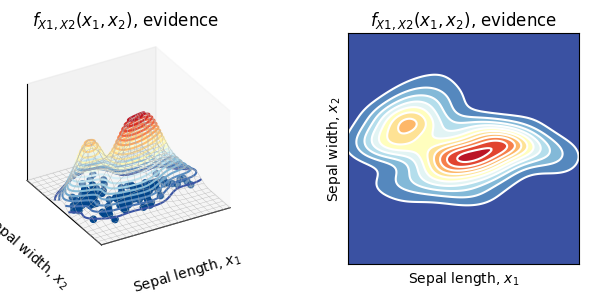

In [36]:
z_height = 0.5
title_txt = '$f_{X1, X2}(x_1, x_2)$, evidence'
plot_surface(xx1, xx2, f_x1_x2, x1_s, x2_s, z_height, '#00448A', title_txt)

In [37]:
# 可视化似然函数

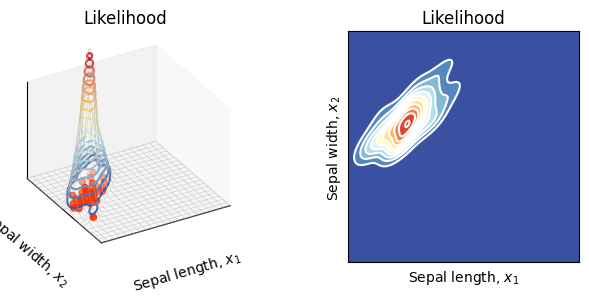

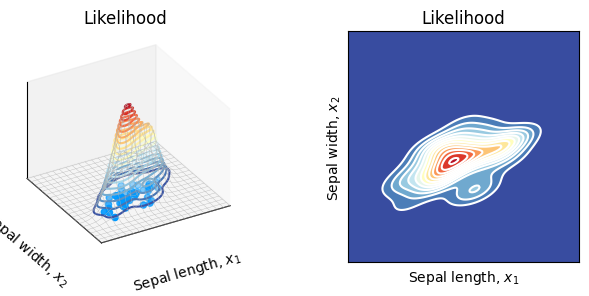

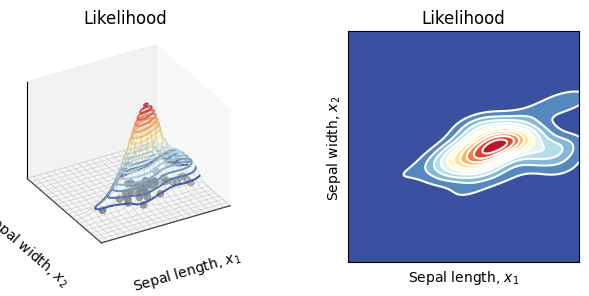

In [39]:
# 考虑不同鸢尾花分类
for idx in range(3):
    KDE_idx = st.gaussian_kde(X1_2_df[y==idx].values.T)
    f_x1_x2_given_C_i = np.reshape(KDE_idx(positions).T, xx1.shape)
    x1_s_C_i = X1_2_df.iloc[:,0][y==idx]
    x2_s_C_i = X1_2_df.iloc[:,1][y==idx]
    z_height = 1
    title_txt = 'Likelihood'
    plot_surface(xx1, xx2, f_x1_x2_given_C_i, x1_s_C_i, x2_s_C_i, z_height, colors[idx], title_txt)